In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Datasets/concrete_data.csv")

In [7]:
df.sample(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
923,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28,39.84
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
864,298.0,0.0,107.0,210.0,11.0,880.0,744.0,28,31.87


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [18]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import PowerTransformer 

In [13]:
X=df.drop(columns=['Strength'])
y=df['Strength']

In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred= lr.predict(X_test)

In [99]:
y_pred.shape

(206,)

In [21]:
r2_score(y_test,y_pred)

0.627553179231485

In [23]:
lr= LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628667

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

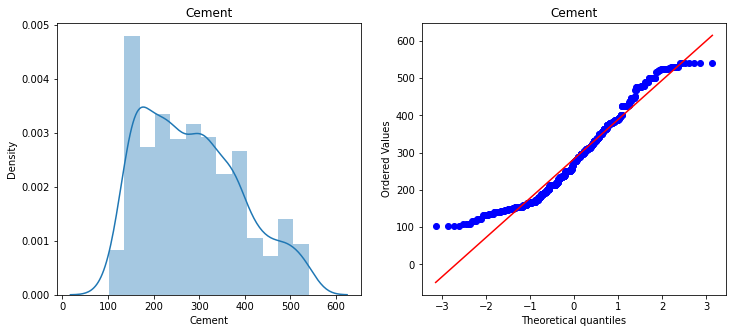

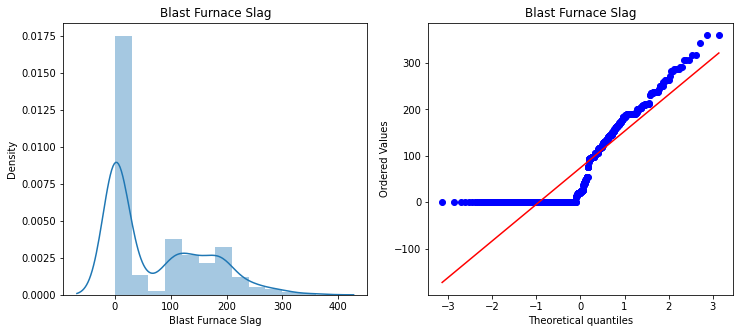

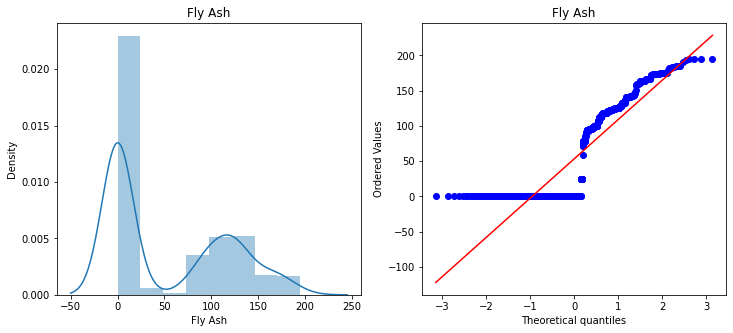

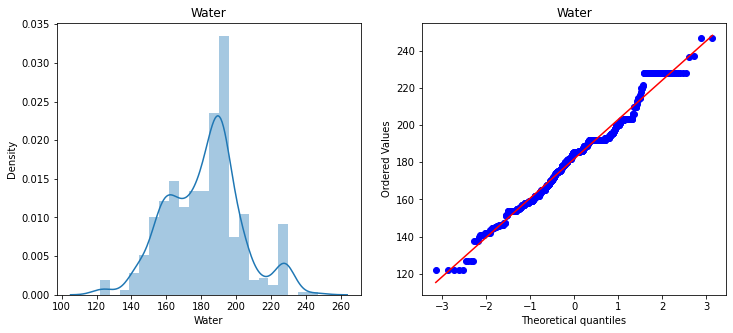

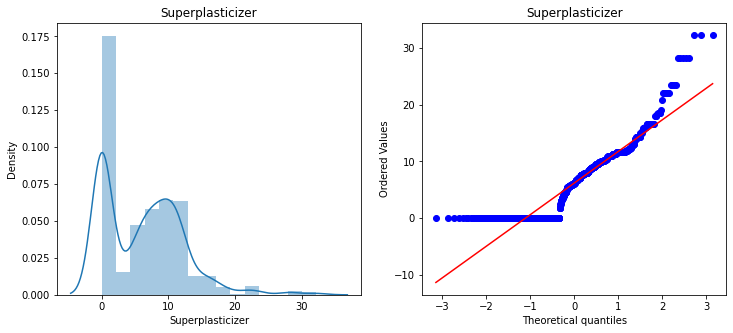

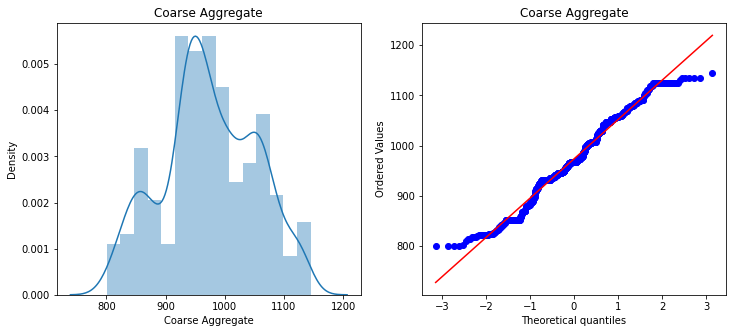

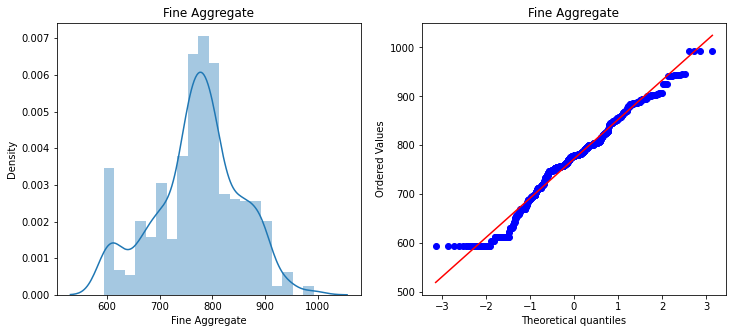

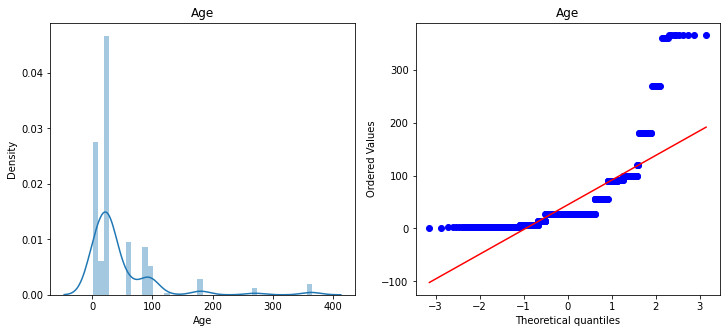

In [26]:
#Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)
    

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler= StandardScaler()

In [31]:
X_train_scaled= scaler.fit_transform(X_train)

In [32]:
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
X_train_scaled 

array([[-1.16087734,  0.85738747,  0.9824489 , ..., -0.25746155,
        -0.64752011, -0.27567315],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 , -0.27567315],
       [-0.0768653 , -0.85558366,  1.06687429, ...,  1.01785948,
         0.06662828, -0.68931339],
       ...,
       [-0.86591441, -0.85558366,  1.12628475, ...,  1.34082214,
         0.33103616,  0.91561074],
       [ 1.78316909,  0.51111191, -0.83113361, ..., -1.54422615,
         0.11605031, -0.27567315],
       [ 0.28509237, -0.85558366,  0.9355459 , ..., -0.6172979 ,
         0.13458358, -0.27567315]])

In [57]:
X_train_scaled_1 = pd.DataFrame(X_train_scaled,columns =X_train.columns)

In [58]:
X_test_scaled_1 = pd.DataFrame(X_test_scaled,columns =X_test.columns)

In [59]:
lr= LinearRegression()

In [60]:
lr.fit(X_train_scaled_1,y_train)

LinearRegression()

In [61]:
y_pred2=lr.predict(X_test_scaled_1)

In [62]:
r2_score(y_pred2, y_test)

0.4688157601823907

In [69]:
#Applying Box-Cox transform

pt=PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.fit_transform(X_test+0.000001)

In [70]:
pd.DataFrame({'cols':X_train.columns, 'box-cox-lambda':pt.lambdas_})

,cols,box-cox-lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [71]:
lr= LinearRegression()
lr.fit(X_train_transformed,y_train)

LinearRegression()

In [72]:
y_pred2= lr.predict(X_test_transformed)

In [73]:
r2_score(y_pred2, y_test)

0.7743427846287538

In [74]:
pt=PowerTransformer(method='box-cox')
X_transformed= pt.fit_transform(X+0.0000001)

In [75]:
lr=LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y, scoring='r2'))

0.665853794221986

In [78]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns= X_train.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

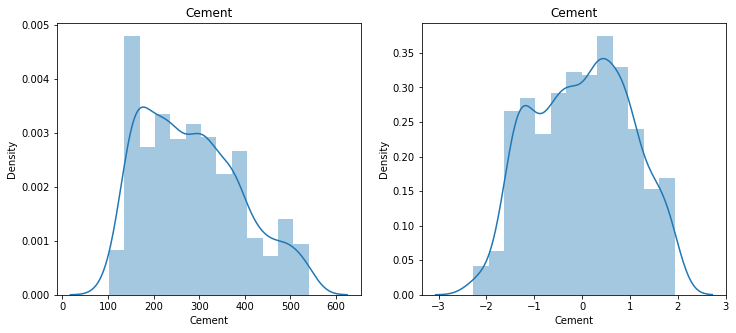

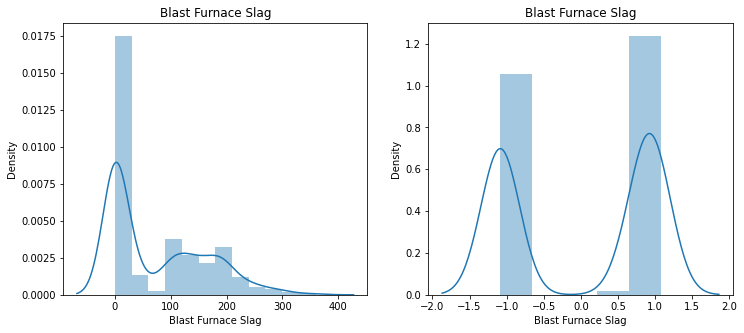

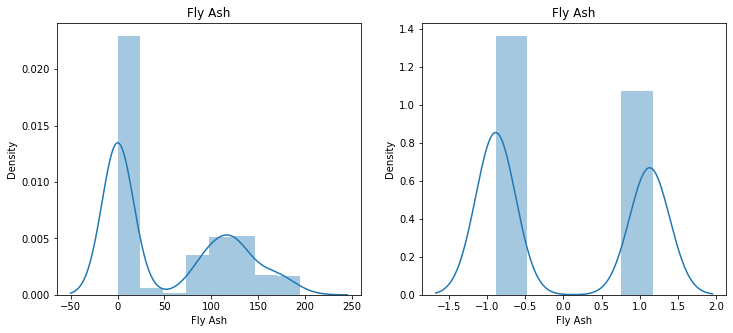

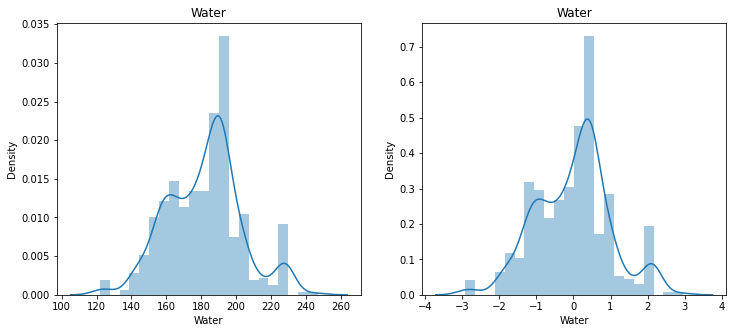

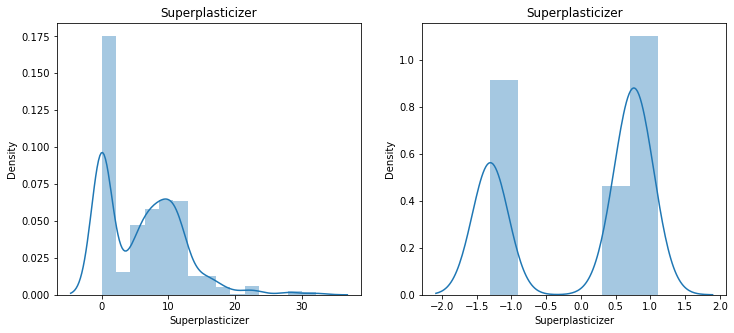

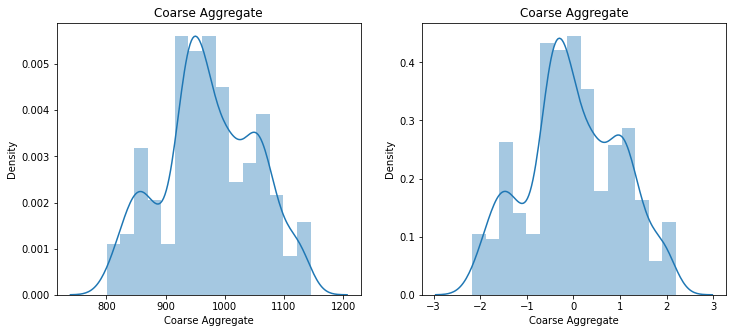

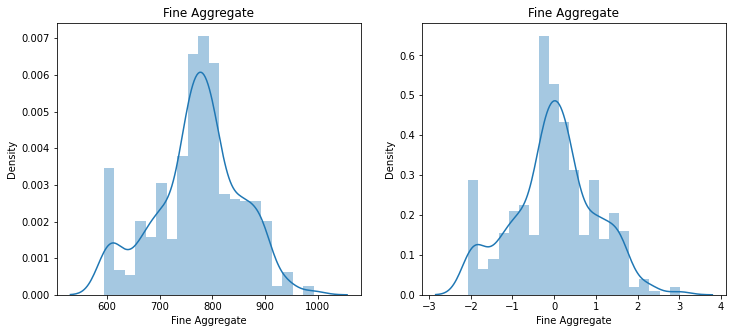

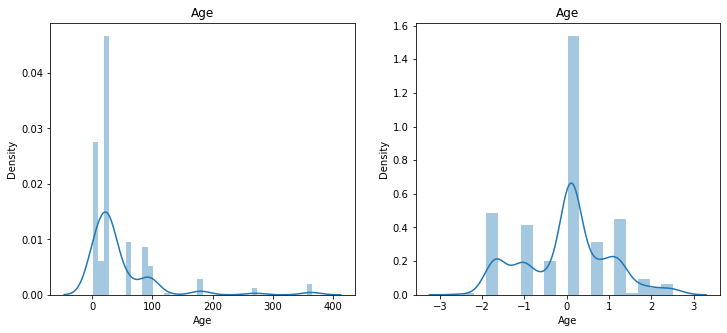

In [80]:
 for col in X_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

In [101]:
pt1 = PowerTransformer(method ='yeo-johnson')

X_train_transformed2= pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

In [102]:
lr =LinearRegression()

In [103]:
lr.fit(X_train_transformed2, y_train)

LinearRegression()

In [104]:
y_pred3= lr.predict(X_test_transformed2)

In [105]:
r2_score(y_pred3, y_test)

0.7797686953273207

In [106]:
pd.DataFrame({'cols':X_train.columns, 'Yeo-Johnson_lambdas': pt1.lambdas_})

,cols,Yeo-Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [107]:
lr =LinearRegression()
X_transformed2= pt1.fit_transform(X)

In [108]:
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625134285743

In [109]:
 pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.022924,0.016633
2,Fly Ash,-0.028797,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.087911,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
